# Miscellaneous Experiments (early data exploration)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cox_violent_path = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/cox-violent-parsed.csv'
cox_violent_filt = pd.read_csv(cox_violent_path)

In [3]:
# get race labels 
race_lbls = []
rows = cox_violent_filt.shape[0]
for i in range(rows):
    race = cox_violent_filt.loc[i, 'race']
    if race not in race_lbls:
        race_lbls.append(race)
print(race_lbls)

['Other', 'Caucasian', 'African-American', 'Hispanic', 'Asian', 'Native American']


In [4]:
# get charge descriptions 
charge_descs = []
rows = cox_violent_filt.shape[0]
for i in range(rows):
    charge_desc = cox_violent_filt.loc[i, 'c_charge_desc']
    if charge_desc not in charge_descs:
        charge_descs.append(charge_desc)
        
i = 0
while i < len(charge_descs):
    print(charge_descs[i], '\t\t\t', charge_descs[i+1])
    i += 2

Aggravated Assault w/Firearm 			 nan
Felony Battery w/Prior Convict 			 Possession of Cocaine
Possession of Cannabis 			 arrest case no charge
Battery 			 Possession Burglary Tools
Possession Of Alprazolam 			 Insurance Fraud
Poss 3,4 MDMA (Ecstasy) 			 Poss3,4 Methylenedioxymethcath
Felony Driving While Lic Suspd 			 Grand Theft in the 3rd Degree
Driving While License Revoked 			 Possession Of Heroin
Battery on Law Enforc Officer 			 Possession Of Methamphetamine
Introduce Contraband Into Jail 			 Poss Pyrrolidinovalerophenone
Lewd/Lasc Battery Pers 12+/<16 			 Trafficking In Methamphetamine
Susp Drivers Lic 1st Offense 			 Carrying Concealed Firearm
Pos Cannabis W/Intent Sel/Del 			 Tampering With Physical Evidence
Att Tamper w/Physical Evidence 			 Felony Petit Theft
Burglary Structure Assault/Batt 			 Fel Drive License Perm Revoke
Agg Fleeing and Eluding 			 Operating W/O Valid License
Poss Wep Conv Felon 			 Possess Cannabis/20 Grams Or Less
Unlaw Use False Name/Identity 			 Viol 

In [5]:
# get number of indivs in data for each race
race_quant = []
for label in race_lbls:
    num_indivs = len(cox_violent_filt[cox_violent_filt['race'] == label])
    race_quant.append(num_indivs)

In [6]:
print(race_quant)
print(np.sum(race_quant))

[860, 6086, 9791, 1451, 71, 57]
18316


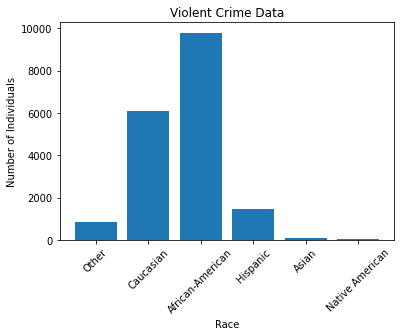

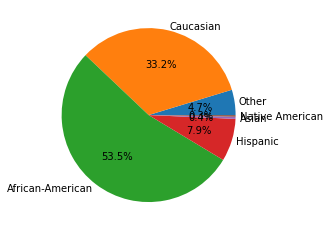

In [7]:
plt.bar(race_lbls, race_quant)
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.ylabel("Number of Individuals")
plt.title("Violent Crime Data")
plt.show()

plt.pie(race_quant, np.zeros(len(race_lbls)), race_lbls, 
        autopct='%1.1f%%', labeldistance=1.05)
plt.show()

In [8]:
# get all charge descriptions related to possession charges
pos_charges = []
for charge in charge_descs:
    if 'Pos' in str(charge):
        pos_charges.append(charge)
        
# num of unique possession charge descriptions
print(len(pos_charges))

96


In [9]:
# get rows corresponding to possession charges
poss_data = cox_violent_filt[cox_violent_filt['c_charge_desc'].isin(pos_charges)]

race_quant_poss = []
for label in race_lbls:
    num_indivs = len(poss_data[poss_data['race'] == label])
    race_quant_poss.append(num_indivs)
    
print(race_quant_poss)
assert(np.sum(race_quant_poss) == poss_data.shape[0])

[114, 1290, 1823, 202, 4, 12]


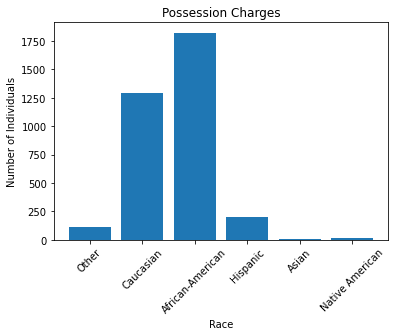

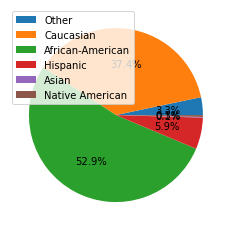

In [10]:
plt.bar(race_lbls, race_quant_poss)
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.ylabel("Number of Individuals")
plt.title("Possession Charges")
plt.show()

plt.pie(race_quant_poss, np.zeros(len(race_lbls)), 
        autopct='%1.1f%%')
plt.legend(race_lbls, loc='upper left')
plt.show()

In [11]:
# get all charge descriptions related to cannabis charges
cb_charges = []
for charge in charge_descs:
    if 'Cannabis' in str(charge) and 'Armed' not in str(charge):
        cb_charges.append(charge)
        
# num of unique cannabis-related charge descriptions
print(len(cb_charges))

17


In [12]:
# get rows corresponding to cannabis charges
cb_data = cox_violent_filt[cox_violent_filt['c_charge_desc'].isin(cb_charges)]

race_quant_cb = []
for label in race_lbls:
    num_indivs = len(cb_data[cb_data['race'] == label])
    race_quant_cb.append(num_indivs)
    
print(race_quant_cb)
assert(np.sum(race_quant_cb) == cb_data.shape[0])

[41, 216, 409, 57, 0, 0]


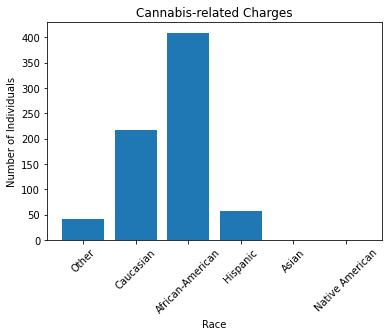

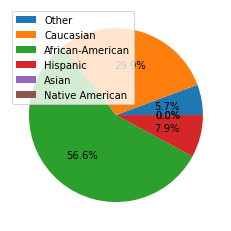

In [13]:
plt.bar(race_lbls, race_quant_cb)
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.ylabel("Number of Individuals")
plt.title("Cannabis-related Charges")
plt.show()

plt.pie(race_quant_cb, np.zeros(len(race_lbls)), 
        autopct='%1.1f%%')
plt.legend(race_lbls, loc='upper left')
plt.show()

In [14]:
# get charge descriptions 
charge_descs = []
rows = cox_violent_filt.shape[0]
for i in range(rows):
    charge_desc = cox_violent_filt.loc[i, 'c_charge_desc']
    if charge_desc not in charge_descs:
        charge_descs.append(charge_desc)

# get all charge descriptions related to cannabis charges
def filter_charge_descs(substr_1, substr_2=None):
    charges = []
    if (substr_2 == None):
        for charge in charge_descs:
            if substr_1 in str(charge):
                charges.append(charge)
    else:
        for charge in charge_descs:
            if substr_1 in str(charge) and substr_2 not in str(charge):
                charges.append(charge)

    # num of unique cannabis-related charge descriptions
    print('num unique charge descriptions:', len(charges))
    return charges

filter_charge_descs('Cannabis', 'Armed')

num unique charge descriptions: 17


['Possession of Cannabis',
 'Pos Cannabis W/Intent Sel/Del',
 'Possess Cannabis/20 Grams Or Less',
 'Manufacture Cannabis',
 'Deliver Cannabis',
 'Pos Cannabis For Consideration',
 'Sale/Del Cannabis At/Near Scho',
 'Purchase Cannabis',
 'Del Cannabis At/Near Park',
 'Possess Cannabis 1000FTSch',
 'Pos Cannabis W/I/D/S Near Worsh',
 'Del Cannabis For Consideration',
 'Sell Cannabis 1000FTChur',
 'Purchase/P/W/Int Cannabis',
 'Deliver Cannabis 1000FTSch',
 'Sell Cannabis',
 'Traffic Cannabis/25-2000lbs']

In [15]:
duplicates_removed = cox_violent_filt.drop_duplicates(subset=cox_violent_filt.columns[1:-1])
print(duplicates_removed.shape)
print(duplicates_removed)
print(cox_violent_filt.columns[1:-1])

(18316, 52)
          id                   name       first        last  \
0          1       miguel hernandez      miguel   hernandez   
1          1       miguel hernandez      miguel   hernandez   
2          2           michael ryan     michael        ryan   
3          3            kevon dixon       kevon       dixon   
4          4               ed philo          ed       philo   
...      ...                    ...         ...         ...   
18311  10998  alexsandra beauchamps  alexsandra  beauchamps   
18312  10999        winston gregory     winston     gregory   
18313  11000            farrah jean      farrah        jean   
18314  11001    florencia sanmartin   florencia   sanmartin   
18315  11001    florencia sanmartin   florencia   sanmartin   

      compas_screening_date     sex         dob  age          age_cat  \
0                2013-08-14    Male  1947-04-18   69  Greater than 45   
1                2013-08-14    Male  1947-04-18   69  Greater than 45   
2           

In [16]:
import pandas as pd
import numpy as np

url = 'https://drive.google.com/file/d/1xAkWFYc7CFCRMtD_Vh6xb0epU2X9DNyj/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [17]:
print(df['race'])

0                   Other
1                   Other
2               Caucasian
3        African-American
4        African-American
               ...       
18311    African-American
18312               Other
18313    African-American
18314            Hispanic
18315            Hispanic
Name: race, Length: 18316, dtype: object


In [18]:
df = df.drop_duplicates(subset=df.columns[1:-1])
#df.head

In [19]:
df_af_amer = df[df['race'] == 'African-American']
df_af_amer = df_af_amer[df_af_amer['type_of_assessment'] == 'Risk of Recidivism']

rows = df_af_amer.shape[0]
df_af_amer.index = np.arange(0, rows)

score_distr_af_amer = {}
score_list_af_amer = []
for i in range(rows):
    score = df_af_amer.loc[i, 'decile_score.1']
    if score not in score_distr_af_amer: score_distr_af_amer[score] = 1
    else: score_distr_af_amer[score] += 1
    score_list_af_amer.append(score)
print(score_distr_af_amer)

df_white = df[df['race'] == 'Caucasian']
df_white = df_white[df_white['type_of_assessment'] == 'Risk of Recidivism']

rows = df_white.shape[0]
df_white.index = np.arange(0, rows)

score_distr_white = {}
score_list_white = []
for i in range(rows):
    score = df_white.loc[i, 'decile_score.1']
    if score not in score_distr_white: score_distr_white[score] = 1
    else: score_distr_white[score] += 1
    score_list_white.append(score)
print(score_distr_white)

print('Avg risk score for African-American offenders:', np.mean(np.array(score_list_af_amer)))
print('Avg risk score for White offenders:', np.mean(np.array(score_list_white)))

{3: 541, 4: 555, 8: 530, 6: 549, 10: 433, 9: 541, -1: 5, 7: 558, 1: 650, 2: 588, 5: 495}
{5: 359, 6: 281, 1: 1113, 10: 88, 3: 446, 4: 428, 2: 569, 9: 156, 8: 170, 7: 213, -1: 8}
Avg risk score for African-American offenders: 5.285215794306703
Avg risk score for White offenders: 3.6306447402766904


In [20]:
df_white

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
1,13.0,edward riddle,edward,riddle,Male,23/07/1974,41,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,6,Medium,19/02/2014,Risk of Violence,2,Low,14,0
2,18.0,elizabeth thieme,elizabeth,thieme,Female,03/06/1976,39,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,1,Low,16/03/2014,Risk of Violence,1,Low,0,0
3,19.0,darrell blackburn,darrell,blackburn,Male,16/11/1995,20,Less than 25,Caucasian,0,...,NaN,Risk of Recidivism,10,High,09/12/2013,Risk of Violence,9,High,0,0
4,22.0,jamie good,jamie,good,Female,23/04/1989,26,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,05/09/2014,Risk of Violence,3,Low,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,NaN,austin harris,austin,harris,Male,07/07/1992,23,Less than 25,Caucasian,0,...,NaN,Risk of Recidivism,8,High,01/10/2013,Risk of Violence,6,Medium,0,0
3827,NaN,christopher tun,christopher,tun,Male,28/04/1992,23,Less than 25,Caucasian,0,...,Assault,Risk of Recidivism,10,High,28/05/2013,Risk of Violence,9,High,5,0
3828,NaN,kevin mcdonald,kevin,mcdonald,Male,21/12/1985,30,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,2,Low,25/06/2014,Risk of Violence,2,Low,1,0
3829,NaN,alexander vega,alexander,vega,Male,15/07/1994,21,Less than 25,Caucasian,0,...,NaN,Risk of Recidivism,6,Medium,10/05/2013,Risk of Violence,7,Medium,0,0


## Ordering & Categorizing Crimes

In [433]:
# see how many unique offense descriptions there are

charge_descs = compas_df['c_charge_desc']
unique_charge_descs = []
for desc in charge_descs:
    if not pd.isna(desc) and desc.lower() not in unique_charge_descs:
        unique_charge_descs.append(desc.lower())
print('# unique charges:', len(unique_charge_descs))

# keyword test
new = [str(x) for x in unique_charge_descs]
new = [x for x in new if 'Poss' in x or 'poss' in x]
print('# unique possession charges:',len(new))
#print(sorted(unique_charge_descs))

# unique charges: 430
# unique possession charges: 77


In [434]:
compas_filt = compas_df[['sex', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'c_charge_degree', 'decile_score']].dropna()
compas_filt

# maybe for PCA, use continuous vars like age, fel/misd counts, & priors, & then convert 
# charge descriptions to continuous var via ranking/scaling by category
# then, create scatter plot and color by race?

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,decile_score
0,Male,Greater than 45,Other,0,0,0,0,F,1
1,Male,25 - 45,African-American,0,0,0,0,F,3
2,Male,Less than 25,African-American,0,0,1,4,F,4
3,Male,Less than 25,African-American,0,1,0,1,F,8
4,Male,25 - 45,Other,0,0,0,2,F,1
...,...,...,...,...,...,...,...,...,...
7209,Male,Less than 25,African-American,0,0,0,0,F,7
7210,Male,Less than 25,African-American,0,0,0,0,F,3
7211,Male,Greater than 45,Other,0,0,0,0,F,1
7212,Female,25 - 45,African-American,0,0,0,3,M,2


In [435]:
tagged_descs_path = 'all_charge_descs_tagged_125.csv'
tagged_descs = pd.read_csv(tagged_descs_path)
tagged_descs.head()

,unique charge descriptions,keywords,destr/appr,violent/property,drug poss,drug involved (incl. intox),weapon poss,white collar
0,Aggravated Assault w/Firearm,"aggravated, assault, firearm",destruction,violent,NaN,NaN,NaN,NaN
1,Felony Battery w/Prior Convict,battery,destruction,violent,NaN,NaN,NaN,NaN
2,Possession of Cocaine,"possession, cocaine",NaN,NaN,y,y,NaN,NaN
3,Possession of Cannabis,"possession, cannabis",NaN,NaN,y,y,NaN,NaN
4,arrest case no charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [436]:
# get keywords associated with crime descs tagged as violent
violent_keywords = list(tagged_descs[tagged_descs['violent/property'] == 'violent']['keywords'])
v_keywords_list = []
# combine into single list
for i in range(len(violent_keywords)):
    v_keywords_list.extend(violent_keywords[i].split(', '))
# remove duplicates
v_keywords_list = list(set(v_keywords_list))

# add relevant keywords
v_keywords_list.extend(['aggrav', 'batt'])
print(v_keywords_list)

## TODO
# think about removing weapon-related keywords and treating separately

['missile', 'resist', 'bodily harm', 'battery', 'aggravated', 'throw', 'molestation', 'lewd', 'domestic violence', 'assault', 'child abuse', 'protection injunction', 'abuse', 'deadly weapon', 'weapon', 'robbery', 'violence', 'firearm', 'deadly', 'violent', 'weap', 'aggrav', 'batt']


In [437]:
# get keywords associated with crime descs tagged as violent
property_keywords = list(tagged_descs[tagged_descs['violent/property'] == 'property']['keywords'])
p_keywords_list = []
# combine into single list
for i in range(len(property_keywords)):
    p_keywords_list.extend(property_keywords[i].split(', '))
# remove duplicates
p_keywords_list = list(set(p_keywords_list))

# remove overlap keywords
p_keywords_list.remove('robbery')
p_keywords_list.remove('possession')

print(p_keywords_list)

['prop', 'unoccupied', 'hire', 'grand theft', 'theft', 'motor vehicle theft', 'property', 'occupied', 'lease', 'burglary', 'burg']


In [438]:
# get keywords associated with crime descs tagged as destruction
destr_keywords = list(tagged_descs[tagged_descs['destr/appr'] == 'destruction']['keywords'])
d_keywords_list = []
# combine into single list
for i in range(len(destr_keywords)):
    d_keywords_list.extend(destr_keywords[i].split(', '))
# remove duplicates
d_keywords_list = list(set(d_keywords_list))

# add relevant keywords
d_keywords_list.extend(['aggrav', 'batt'])
# remove overlap keywords
d_keywords_list.remove('occupied')
d_keywords_list.remove('weapon')
d_keywords_list.remove('deadly weapon')
print(d_keywords_list)

['missile', 'bodily harm', 'battery', 'aggravated', 'throw', 'molestation', 'lewd', 'domestic violence', 'assault', 'child abuse', 'protection injunction', 'abuse', 'firearm', 'deadly', 'violent', 'weap', 'aggrav', 'batt']


In [439]:
# get keywords associated with crime descs tagged as appropriation
appr_keywords = list(tagged_descs[tagged_descs['destr/appr'] == 'appropriation']['keywords'])
a_keywords_list = []
# combine into single list
for i in range(len(appr_keywords)):
    a_keywords_list.extend(appr_keywords[i].split(', '))
# remove duplicates
a_keywords_list = list(set(a_keywords_list))

# remove overlap keywords
a_keywords_list.remove('weapon')
a_keywords_list.remove('occupied')
a_keywords_list.remove('unoccupied')
a_keywords_list.remove('possession')
print(a_keywords_list)

['prop', 'robbery', 'hire', 'grand theft', 'theft', 'motor vehicle theft', 'property', 'lease', 'burglary', 'burg']


In [440]:
compas_df = compas_df.dropna(subset=['c_charge_desc'])
c_charge_desc_list = list(compas_df['c_charge_desc'])

charge_violent_encoding = []
charge_prop_encoding = []
charge_destr_encoding = []
charge_appr_encoding = []

for desc in c_charge_desc_list:
    desc = desc.lower()
    v_encoding = any(word in desc for word in v_keywords_list)
    charge_violent_encoding.append(int(v_encoding))
    d_encoding = any(word in desc for word in d_keywords_list)
    charge_destr_encoding.append(int(d_encoding))
    a_encoding = any(word in desc for word in a_keywords_list)
    charge_appr_encoding.append(int(a_encoding))
    p_encoding = any(word in desc for word in p_keywords_list)
    charge_prop_encoding.append(int(p_encoding))
    
compas_df.loc[:, ('violent')] = charge_violent_encoding
compas_df.loc[:, ('destruction')] = charge_destr_encoding
compas_df.loc[:, ('appropriation')] = charge_appr_encoding
compas_df.loc[:, ('property')] = charge_prop_encoding
compas_df[['c_charge_desc','violent', 'destruction', 'appropriation', 'property']]

/Users/carinalewandowski/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/carinalewandowski/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,c_charge_desc,violent,destruction,appropriation,property
0,Aggravated Assault w/Firearm,1,1,0,0
1,Felony Battery w/Prior Convict,1,1,0,0
2,Possession of Cocaine,0,0,0,0
3,Possession of Cannabis,0,0,0,0
4,arrest case no charge,0,0,0,0
...,...,...,...,...,...
7209,Deliver Cannabis,0,0,0,0
7210,Leaving the Scene of Accident,0,0,0,0
7211,Aggravated Battery / Pregnant,1,1,0,0
7212,Battery on Law Enforc Officer,1,1,0,0


In [441]:
test = compas_df[compas_df['violent'] == True]
test[test['appropriation'] == True][['c_charge_desc','violent', 'property', 'destruction', 'appropriation']]

,c_charge_desc,violent,property,destruction,appropriation
79,Burglary Dwelling Assault/Batt,1,1,1,1
162,Burglary Conveyance Assault/Bat,1,1,1,1
226,Robbery / No Weapon,1,0,1,1
230,Robbery / Weapon,1,0,1,1
233,Burglary With Assault/battery,1,1,1,1
...,...,...,...,...,...
7015,Robbery Sudd Snatch No Weapon,1,0,1,1
7049,Robbery / No Weapon,1,0,1,1
7112,Burglary Conveyance Assault/Bat,1,1,1,1
7158,Robbery Sudd Snatch No Weapon,1,0,1,1


In [442]:
compas_cats = compas_df[['sex', 'age', 'age_cat', 'race', 'c_charge_desc', 'violent', 'property', 'destruction', 'appropriation']]

b_violent = compas_cats.loc[compas_cats['race'] == 'African-American', 'violent'].sum()
b_prop = compas_cats.loc[compas_cats['race'] == 'African-American', 'property'].sum()
b_destr = compas_cats.loc[compas_cats['race'] == 'African-American', 'destruction'].sum()
b_appr = compas_cats.loc[compas_cats['race'] == 'African-American', 'appropriation'].sum()
b_sums = ['African-American', b_violent, b_prop, b_destr, b_appr]

w_violent = compas_cats.loc[compas_cats['race'] == 'Caucasian', 'violent'].sum()
w_prop = compas_cats.loc[compas_cats['race'] == 'Caucasian', 'property'].sum()
w_destr = compas_cats.loc[compas_cats['race'] == 'Caucasian', 'destruction'].sum()
w_appr = compas_cats.loc[compas_cats['race'] == 'Caucasian', 'appropriation'].sum()
w_sums = ['Caucasian', w_violent, w_prop, w_destr, w_appr]

cat_sums_df = pd.DataFrame(np.array([b_sums, w_sums]), columns=['race', 'violent', 'property', 'destruction', 'appropriation'])
cat_sums_df

,race,violent,property,destruction,appropriation
0,African-American,1066,590,1002,634
1,Caucasian,756,387,720,398


In [443]:
b_tot = 1066 + 590 + 1002 + 634
w_tot = 756 + 387 + 720 + 398

In [444]:
print(1066/b_tot)
print(590/b_tot)
print(1002/b_tot)
print(634/b_tot)

print('\n')
print((1066/b_tot)/(590/b_tot))
print((1002/b_tot)/(634/b_tot))

0.3238153098420413
0.17922235722964763
0.3043742405832321
0.19258809234507898


1.806779661016949
1.5804416403785488


In [445]:
print(756/w_tot)
print(387/w_tot)
print(720/w_tot)
print(398/w_tot)

print('\n')
print((756/w_tot)/(387/w_tot))
print((720/w_tot)/(398/w_tot))

0.33436532507739936
0.17116320212295444
0.31844316674038037
0.1760283060592658


1.9534883720930232
1.8090452261306533


## Visualization

In [210]:
def compute_avg_point(xs, ys):
    avg_x = np.sum(xs)/len(xs)
    avg_y = np.sum(ys)/len(ys)
    return (avg_x, avg_y)

In [228]:
# display topic-topic scatter plot given races, dims
def display_scatter(df, races, dim1, dim2, colors, xlab, ylab, title):
    df_filt = [df[df['race'] == race] for race in races]
    
    # scatter by race
    for i in range(len(df_filt)):
        xs = df_filt[i][dim1]
        ys = df_filt[i][dim2]
        plt.scatter(x=xs,y=ys,c=colors[races[i]][0],label=races[i])
        avg = compute_avg_point(xs, ys)
        avg_rd = (round(avg[0], 3), round(avg[1], 3))
        plt.scatter(x=avg[0],y=avg[1],c=colors[races[i]][1],label=races[i] + ' Avg.: ' + str(avg_rd))
    
    # add fig axes/legend/title
    plt.legend(title='Race')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()

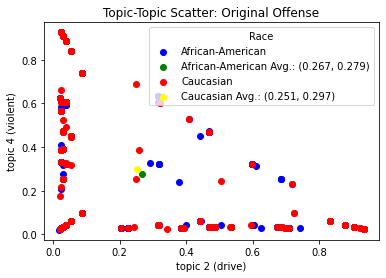

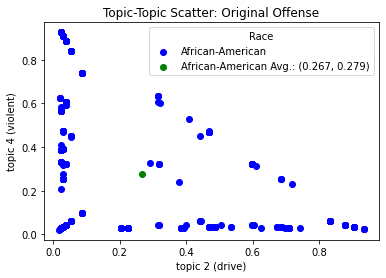

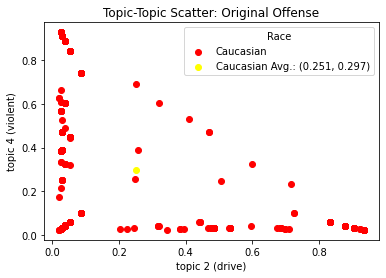

In [343]:
colors = {'African-American':['blue', 'green'], 'Caucasian':['red', 'yellow']}
display_scatter(compas_df_topics, ['African-American', 'Caucasian'], 't3', 't5', colors, 'topic 2 (drive)', 'topic 4 (violent)', 'Topic-Topic Scatter: Original Offense')
display_scatter(compas_df_topics, ['African-American'], 't3', 't5', colors, 'topic 2 (drive)', 'topic 4 (violent)', 'Topic-Topic Scatter: Original Offense')
display_scatter(compas_df_topics, ['Caucasian'], 't3', 't5', colors, 'topic 2 (drive)', 'topic 4 (violent)', 'Topic-Topic Scatter: Original Offense')

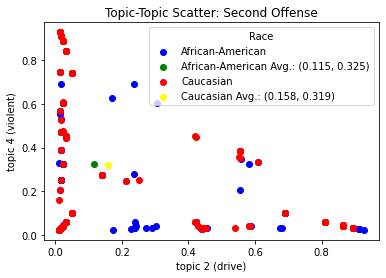

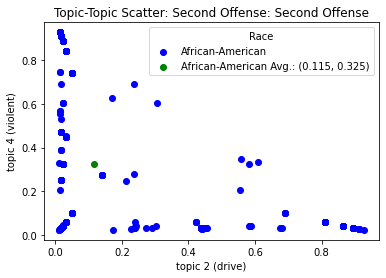

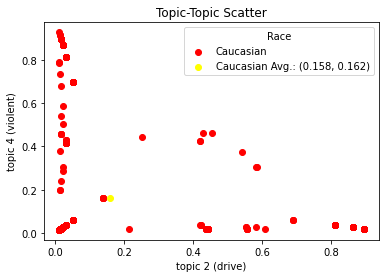

In [344]:
colors = {'African-American':['blue', 'green'], 'Caucasian':['red', 'yellow']}
display_scatter(r_compas_df_topics, ['African-American', 'Caucasian'], 't2', 't4', colors, 'topic 2 (drive)', 'topic 4 (violent)', 'Topic-Topic Scatter: Second Offense')
display_scatter(r_compas_df_topics, ['African-American'], 't2', 't4', colors, 'topic 2 (drive)', 'topic 4 (violent)', 'Topic-Topic Scatter: Second Offense: Second Offense')
display_scatter(r_compas_df_topics, ['Caucasian'], 't2', 't5', colors, 'topic 2 (drive)', 'topic 4 (violent)', 'Topic-Topic Scatter')

## LDA Model Building: Implemented based on Gensim Documentation examples
https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py

In [124]:
# import topic modeling libraries
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [26]:
def visualize_model(model, corpus, dictionary):
    return pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

In [19]:
# create a dictionary representation of documents (charge descriptions)
tokenized_stemmed = stem_tokens(tokenized_descs)
dictionary = Dictionary(tokenized_stemmed)

# dictionary.filter_extremes(no_below=3, no_above=0.5)

# create a BoW representation of the documents
corpus = [dictionary.doc2bow(desc) for desc in tokenized_stemmed]

In [20]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 428
Number of documents: 7185


In [54]:
# Set up log to terminal: https://miningthedetails.com/blog/python/lda/GensimLDA/
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#Supress default INFO logging

#import logging
#logger = logging.getLogger()
#logger.setLevel(logging.CRITICAL)

In [23]:
# NOTE: set random seed
# set training parameters 
num_topics = 5
chunksize = 10000
passes = 20
iterations = 400
eval_every = 1

temp = dictionary[0]
id2word = dictionary.id2token

# build model
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [80]:
top_topics = model.top_topics(corpus)
avg_topic_coher = sum(t[1] for t in top_topics) / num_topics

print('Average topic coherence: %.4f.' % avg_topic_coher)

#pprint(top_topics)

Average topic coherence: -19.5958.


In [27]:
visualize_model(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.248000 -0.123399       1        1  18.165289
1      0.278194  0.002663       2        1  18.704818
2      0.279709 -0.027695       3        1  19.721858
3     -0.155911  0.385750       4        1  22.629155
4     -0.153993 -0.237319       5        1  20.778881, topic_info=       Term         Freq        Total Category  logprob  loglift
3   batteri  1593.000000  1593.000000  Default  30.0000  30.0000
10   arrest  1105.000000  1105.000000  Default  29.0000  29.0000
12    charg  1105.000000  1105.000000  Default  28.0000  28.0000
11     case  1104.000000  1104.000000  Default  27.0000  27.0000
8   possess  1202.000000  1202.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
48  attempt    28.365148    53.918870   Topic5  -4.9621   0.9289
5    feloni    66.661772   363.842429   Topic5  -4.1077  -0.1259
25    theft    76.501954   666.734245   Topic5  -3.9700  -0.5938
55   weapon    50.233395   235.558953   Topic5  -4.3906   0.0260
73   vehicl    41.008905   215.428398   Topic5  -4.5935  -0.0876

[227 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
126       2  0.953500     abus
123       5  0.985572    accid
266       3  0.940180      act
0         2  0.580793   aggrav
0         3  0.417269   aggrav
...     ...       ...      ...
65        4  0.208524  violenc
55        3  0.785366   weapon
55        5  0.212261   weapon
167       2  0.953500      wit
190       2  0.769337      yrs

[214 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [328]:
# train second LDA model

# set training parameters 
num_topics = 5
chunksize = 10000
passes = 20
iterations = 400
eval_every = 1

temp = dictionary[0]
id2word = dictionary.id2token

model2 = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=25
)

In [28]:
pprint(model.print_topics())

[(0,
  '0.166*"theft" + 0.152*"grand" + 0.124*"degre" + 0.062*"violenc" + '
  '0.039*"deliveri" + 0.037*"intent" + 0.036*"sell" + 0.030*"cannabi" + '
  '0.030*"vehicl" + 0.030*"possess"'),
 (1,
  '0.437*"batteri" + 0.056*"aggrav" + 0.054*"feloni" + 0.040*"drive" + '
  '0.038*"influenc" + 0.028*"domest" + 0.027*"strangul" + 0.021*"tamper" + '
  '0.020*"harm" + 0.020*"deliv"'),
 (2,
  '0.129*"licens" + 0.097*"drive" + 0.086*"burglari" + 0.063*"suspend" + '
  '0.056*"revok" + 0.056*"unoccupi" + 0.049*"assault" + 0.048*"weapon" + '
  '0.045*"dead" + 0.039*"aggrav"'),
 (3,
  '0.250*"arrest" + 0.250*"charg" + 0.250*"case" + 0.027*"offic" + '
  '0.015*"vehicl" + 0.014*"level" + 0.013*"law" + 0.013*"minor" + '
  '0.013*"violenc" + 0.013*"resist"'),
 (4,
  '0.271*"possess" + 0.131*"cocain" + 0.050*"cannabi" + 0.030*"petit" + '
  '0.030*"damag" + 0.028*"properti" + 0.027*"gram" + 0.024*"less" + '
  '0.019*"theft" + 0.019*"injuri"')]


In [167]:
def topic_distr_to_cols(model, tokenized_docs):
    topics = [model.get_document_topics(dictionary.doc2bow(doc), minimum_probability=0) for doc in tokenized_docs]
    rows = [[topic_distr[i][1] for i in range(len(topic_distr))] for topic_distr in topics]
    columns = [[row[i] for row in rows] for i in range(len(row))] 
    return columns
    
def get_max_topics(model, tokenized_docs):
    topics = [model.get_document_topics(dictionary.doc2bow(doc), minimum_probability=0) for doc in tokenized_docs]
    rows = [[topic_distr[i][1] for i in range(len(topic_distr))] for topic_distr in topics]
    max_topics = [np.argmax(row) + 1 for row in rows]
    return max_topics

### Create Topic Distribution Dataframe for First Offense Charge Descriptions

In [166]:
tokenized_stemmed = stem_tokens(tokenized_descs)
cols = topic_distr_to_cols(model, tokenized_stemmed)
max_topics = get_max_topics(model, tokenized_stemmed)
d = {
     'id': compas_df_charge_filt['id'], 
     'name': compas_df_charge_filt['name'], 
     'race': compas_df_charge_filt['name'], 
     'charge description': compas_df_charge_filt['c_charge_desc'], 
     'tokenized description': tokenized_stemmed,
     'max topic': max_topics, 
     't1': cols[0], 't2': cols[1], 't3': cols[2], 't4': cols[3], 't5': cols[4]}
compas_df_topics = pd.DataFrame(data=d)
compas_df_topics

[0.02523719, 0.88318557, 0.027123129, 0.031303093, 0.033150993]


,id,name,race,charge description,tokenized description,max topic,t1,t2,t3,t4,t5
0,1,miguel hernandez,miguel hernandez,Aggravated Assault w/Firearm,"[aggrav, assault, firearm]",2,0.025237,0.883186,0.027123,0.031303,0.033151
1,3,kevon dixon,kevon dixon,Felony Battery w/Prior Convict,"[feloni, batteri, prior, convict]",2,0.019687,0.908891,0.021150,0.024409,0.025863
2,4,ed philo,ed philo,Possession of Cocaine,"[possess, cocain]",5,0.035144,0.052206,0.037754,0.043574,0.831321
3,5,marcu brown,marcu brown,Possession of Cannabis,"[possess, cannabi]",5,0.035146,0.052206,0.037754,0.043574,0.831319
4,6,bouthy pierrelouis,bouthy pierrelouis,arrest case no charge,"[arrest, case, charg]",4,0.025237,0.037489,0.027111,0.877013,0.033151
...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven butler,Deliver Cannabis,"[deliveri, cannabi]",1,0.820242,0.052206,0.037754,0.043574,0.046224
7210,10997,malcolm simmons,malcolm simmons,Leaving the Scene of Accident,"[leav, scene, accid]",5,0.025237,0.037489,0.027111,0.031291,0.878872
7211,10999,winston gregory,winston gregory,Aggravated Battery / Pregnant,"[aggrav, batteri, pregnant]",2,0.025237,0.883209,0.027113,0.031290,0.033151
7212,11000,farrah jean,farrah jean,Battery on Law Enforc Officer,"[batteri, law, enforc, offic]",4,0.019687,0.249165,0.021149,0.684139,0.025861


In [86]:
# check c_charge_desc against r_charge_desc
idx = compas_df['r_charge_desc'].isna() == False
compas_df.loc[idx][['name','c_charge_desc','r_charge_desc']]

,name,c_charge_desc,r_charge_desc
1,kevon dixon,Felony Battery w/Prior Convict,Felony Battery (Dom Strang)
2,ed philo,Possession of Cocaine,Driving Under The Influence
6,edward riddle,Possession Burglary Tools,Poss of Firearm by Convic Felo
9,bo bradac,Insurance Fraud,Battery
11,ellyaher lanza,Battery,Driving License Suspended
...,...,...,...
7201,kyle miller,Possession of Cocaine,Operating W/O Valid License
7205,christopher tun,arrest case no charge,Assault
7206,alexander vega,Grand Theft (Motor Vehicle),Possess Cannabis/20 Grams Or Less
7207,jarred payne,Possess Cannabis/20 Grams Or Less,Possession of Cannabis


### Create Topic Distribution Dataframe for Second Offense Charge Descriptions

In [168]:
r_tokenized_stemmed = stem_tokens(r_tokenized_descs)
r_cols = topic_distr_to_cols(model, r_tokenized_stemmed)
r_max_topics = get_max_topics(model, r_tokenized_stemmed)
d = {
     'id': r_compas_df_charge_filt['id'], 
     'name': r_compas_df_charge_filt['name'], 
     'race': r_compas_df_charge_filt['race'], 
     'charge description': r_compas_df_charge_filt['c_charge_desc'], 
     'tokenized desc': r_tokenized_stemmed,
     'max topic': r_max_topics, 
     't1': r_cols[0], 't2': r_cols[1], 't3': r_cols[2], 't4': r_cols[3], 't5': r_cols[4]
    }
r_compas_df_topics = pd.DataFrame(data=d)
r_compas_df_topics[:10]

,id,name,race,charge description,tokenized desc,max topic,t1,t2,t3,t4,t5
1,3,kevon dixon,African-American,Felony Battery w/Prior Convict,"[feloni, batteri, domest, strangul]",2,0.019687,0.908891,0.021150,0.024409,0.025863
2,4,ed philo,African-American,Possession of Cocaine,"[drive, influenc]",2,0.035144,0.837351,0.037766,0.043574,0.046165
6,8,edward riddle,Caucasian,Possession Burglary Tools,"[possess, firearm, convict, felon]",2,0.019688,0.469167,0.021150,0.024426,0.465570
9,13,bo bradac,Caucasian,Insurance Fraud,[batteri],2,0.057858,0.732249,0.062155,0.071737,0.076001
11,15,ellyaher lanza,African-American,Battery,"[drive, licens, suspend]",3,0.025237,0.037505,0.872817,0.031290,0.033151
14,19,craig gilbert,Caucasian,arrest case no charge,"[grand, theft, motor, vehicl]",1,0.899330,0.029244,0.021149,0.024412,0.025864
15,20,samuel seraphin,African-American,Felony Driving While Lic Suspd,"[crimin, mischief]",5,0.035144,0.052206,0.037757,0.043575,0.831318
18,23,neil heckart,Caucasian,Driving While License Revoked,"[grand, theft, degre]",1,0.870958,0.037489,0.027111,0.031290,0.033152
19,24,michael lux,Caucasian,Possession Of Heroin,"[possess, cocain]",5,0.035144,0.052206,0.037754,0.043574,0.831321
20,25,columbus wilson,African-American,arrest case no charge,"[possess, cocain, intent, deliveri, sell]",1,0.587760,0.023973,0.017336,0.020009,0.350922
